In [12]:
%reload_ext autoreload
%autoreload 2

from PySpice.Spice.Netlist import Circuit, SubCircuit
from PySpice.Spice.Parser import SpiceParser
from PySpice.Probe.WaveForm import WaveForm
from PySpice.Unit import *
import PySpice
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ltspice
import os
from helpers import *
from spice_net import *

In [13]:
# setup logging 
from PySpice.Logging import Logging
logger = Logging.setup_logging(logging_level='ERROR')

In [14]:
# ngspice
PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR = 'ngspice-subprocess' 

# Xyce
# import PySpice.Spice.Xyce.Server
# PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR = 'xyce-serial'
# PySpice.Spice.Xyce.Server.XyceServer.XYCE_COMMAND = '/Users/lancemathias/Projects/Xyce_build/src/Xyce'

## Simple tests

In [4]:
parser = SpiceParser(path='data/Draft11.net')
circuit = parser.build_circuit()

In [103]:
circuit.title = 'Draft11'

In [104]:
print(circuit)

.title Draft11
M1 N003 N005 N001 N001 NMOS
V1 N003 0 .5
VG N005 0 1
M2 N001 N005 P001 P001 NMOS
VC P001 0 0
V2 N001 0 0
.model NMOS NMOS ()
.model PMOS PMOS ()



In [105]:
simulator = circuit.simulator()

In [106]:
simulator.options(ngbehavior='lt')
simulator._options

{'TEMP': UnitValue(27 °C), 'TNOM': UnitValue(27 °C), 'ngbehavior': 'lt'}

In [107]:
analysis = simulator.dc(V2=slice(0, 0.5, 0.01))

2024-03-08 22:25:39,941 - PySpice.Spice.Xyce.Simulation.XyceCircuitSimulator - Simulation.DEBUG - desk
.title Draft11
M1 N003 N005 N001 N001 NMOS
V1 N003 0 .5
VG N005 0 1
M2 N001 N005 P001 P001 NMOS
VC P001 0 0
V2 N001 0 0
.model NMOS NMOS ()
.model PMOS PMOS ()
.options TEMP = 27
.options TNOM = 27
.options ngbehavior = lt
.dc V2 0 0.5 0.01
.end

2024-03-08 22:25:39,942 - PySpice.Spice.Xyce.Server.XyceServer - Server.DEBUG - Start the xyce subprocess
2024-03-08 22:25:39,946 - PySpice.Spice.Xyce.Server.XyceServer - Server.INFO - Run /Users/lancemathias/Projects/Xyce_build/src/Xyce -r /var/folders/p1/kynpdwyn2r5fmbpnr8d45m340000gn/T/tmprmnx2k_f/output.raw /var/folders/p1/kynpdwyn2r5fmbpnr8d45m340000gn/T/tmprmnx2k_f/input.cir
2024-03-08 22:25:40,024 - PySpice.Spice.Xyce.Server.XyceServer - Server.INFO - 

*****
***** Welcome to the Xyce(TM) Parallel Electronic Simulator
*****
***** This is version Xyce Release 7.8-opensource
***** Date: Fri Mar 08 22:25:39 PST 2024


***** Executing netl

In [108]:
analysis.V2

WaveForm V2 [ 7.50000069e-06  7.10200067e-06  6.70800064e-06  6.31800061e-06
  5.93200058e-06  5.55000055e-06  5.17200053e-06  4.79800050e-06
  4.42800047e-06  4.06200044e-06  3.70000042e-06  3.34200039e-06
  2.98800036e-06  2.63800033e-06  2.29200031e-06  1.95000028e-06
  1.61200025e-06  1.27800022e-06  9.48000194e-07  6.22000166e-07
  3.00000139e-07 -1.79998891e-08 -3.31999917e-07 -6.41999945e-07
 -9.47999972e-07 -1.25000000e-06 -1.54800003e-06 -1.84200006e-06
 -2.13200008e-06 -2.41800011e-06 -2.70000014e-06 -2.97800017e-06
 -3.25200019e-06 -3.52200022e-06 -3.78800025e-06 -4.05000028e-06
 -4.30800031e-06 -4.56200033e-06 -4.81200036e-06 -5.05800039e-06
 -5.30000042e-06 -5.53800044e-06 -5.77200047e-06 -6.00200050e-06
 -6.22800053e-06 -6.45000055e-06 -6.66800058e-06 -6.88200061e-06
 -7.09200064e-06 -7.29800067e-06 -7.50000069e-06]@A

## Try out transistor net

In [15]:
np.random.seed(0)

grid_graph = nx.grid_graph([4, 4], periodic=True)

for e in grid_graph.edges:
    # grid_graph[e[0]][e[1]]['weight'] = np.random.uniform(0, 1)    # random init
    grid_graph[e[0]][e[1]]['weight'] = 5                            # init to max value

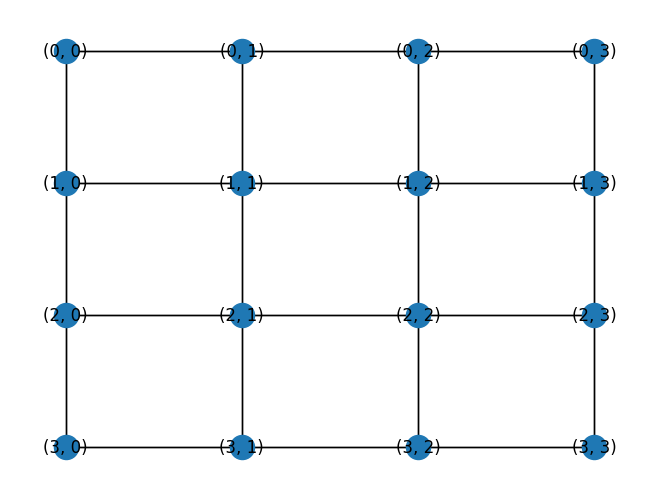

In [16]:
nx.draw(grid_graph, pos={(x,y):(y,-x) for x,y in grid_graph.nodes()}, with_labels=True)

In [17]:
n_pts = 20
np.random.seed(0)

dset = {}
dset['x'] = np.sort(np.random.uniform(0, 1, (n_pts, 1)), axis=0)
dset['y'] = dset['x']**2

In [18]:
transistor = GroundReferenceNetwork('groundref_test', con_graph=grid_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)

In [19]:
transistor.predict(dset['x'])

array([[0.01009896],
       [0.03539097],
       [0.0433732 ],
       [0.18789959],
       [0.20714379],
       [0.21380968],
       [0.25706989],
       [0.26459859],
       [0.26645128],
       [0.27548538],
       [0.29173567],
       [0.31182019],
       [0.34389621],
       [0.37284463],
       [0.37890514],
       [0.39791743],
       [0.4154674 ],
       [0.42579811],
       [0.44269952],
       [0.46301565]])

In [9]:
print(transistor)

.title groundref_test
.subckt e1 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e1

.subckt e2 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e2

.subckt e3 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e3

.subckt e4 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e4

.subckt e5 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e5

.subckt e6 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e6

.subckt e7 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e7

.subckt e8 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e8

.subckt e9 t_D t_S gnd
V1 t_G gnd 5
R1 t_D t_S 1e+

In [10]:
eta = 0.1
gamma = 10*1/eta
epochs = 100
transistor, loss, updates, weights = train(transistor, dset['x'], dset['y'], epochs=epochs, gamma=gamma, eta=eta, log_steps=list(range(0, epochs, 10)))

Epoch 1: 0.028722958433658862
Epoch 11: 0.024674450963059907
Epoch 21: 0.021166639377025873
Epoch 31: 0.02148492495961885
Epoch 41: 0.02025743032020725
Epoch 51: 0.02001770098365105
Epoch 61: 0.01960485450847984
Epoch 71: 0.019209977289433883
Epoch 81: 0.019024068578821406
Epoch 91: 0.01861174378377705
